In [1]:
import pandas as pd
import numpy as np
import math
import sqlite3

import matplotlib.pyplot as pyplt
import seaborn as sns
import seaborn.objects as snsso 

import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter
from  matplotlib.ticker import FuncFormatter

In [2]:
dbConn = sqlite3.connect("/Users/aba-sah/OneDrive/work/programming/devt/r/work/sta/it-402-dc/sta_it_402/data/sqa-data-db.sqlite")
dbConn

In [3]:
gender_colour_scheme = {"female": "#882255", "male": "#117733"}
gender_colour_scheme

{'female': '#882255', 'male': '#117733'}

In [4]:
pd.read_sql_query("SELECT * FROM sqa_data LIMIT 6", dbConn)

,qualification,year,Subject,NumberOfCentres,gender,grade,NoOfStudents
0,CSYS,1986,Art and Design (Enquiry),127,male,Entries,86.0
1,CSYS,1986,Art and Design (Enquiry),127,male,percentage,0.0
2,CSYS,1986,Art and Design (Enquiry),127,male,A,7.0
3,CSYS,1986,Art and Design (Enquiry),127,male,B,13.0
4,CSYS,1986,Art and Design (Enquiry),127,male,C,25.0
5,CSYS,1986,Art and Design (Enquiry),127,male,D,29.0


In [5]:
pd.read_sql_query("SELECT * FROM subject_groups LIMIT 6", dbConn)

,Subject,SubjectGroup,CommonSubjectLabel,qualification,year,SubjectTaken,SCQFLevel
0,English,English,English,National3,2014,Yes,3.0
1,English,English,English,National3,2015,Yes,3.0
2,English,English,English,National3,2016,Yes,3.0
3,English,English,English,National3,2017,Yes,3.0
4,English,English,English,National3,2018,Yes,3.0
5,English,English,English,National3,2019,Yes,3.0


In [6]:
gender_distribution_computing = \
    pd.read_sql_query("SELECT qualification, year, Subject, SubjectGroup, CommonSubjectLabel, \
                         NumberOfCentres, gender, grade, NoOfStudents FROM sqa_data \
                         LEFT JOIN (SELECT Subject, SubjectGroup, CommonSubjectLabel, qualification, year \
                             FROM subject_groups \
                         ) subject_groups USING (Subject, qualification, year) \
                         INNER JOIN (SELECT * FROM grade_groups \
                             WHERE (grade_type = 'letter') \
                         ) grade_groups USING (grade) \
                         \
                         WHERE (qualification = 'Higher') AND \
                                 (gender != 'all') AND (grade NOT IN ('Entries')) AND \
                                 (NoOfStudents IS NOT NULL) AND \
                                 (subject_groups.SubjectGroup LIKE '%Computing%')", 
                      dbConn)
    
gender_distribution_computing

,qualification,year,Subject,SubjectGroup,CommonSubjectLabel,NumberOfCentres,gender,grade,NoOfStudents
0,Higher,1989,Computing Studies,Computing,None,70.0,male,A,58.0
1,Higher,1989,Computing Studies,Computing,None,70.0,male,B,85.0
2,Higher,1989,Computing Studies,Computing,None,70.0,male,C,145.0
3,Higher,1989,Computing Studies,Computing,None,70.0,male,D,84.0
4,Higher,1989,Computing Studies,Computing,None,70.0,female,A,10.0
...,...,...,...,...,...,...,...,...,...
299,Higher,2019,Computing Science,Computing,None,NaN,female,A,181.0
300,Higher,2020,Computing Science,Computing,None,NaN,male,A,967.0
301,Higher,2020,Computing Science,Computing,None,NaN,female,A,274.0
302,Higher,2021,Computing Science,Computing,None,NaN,male,A,1329.0


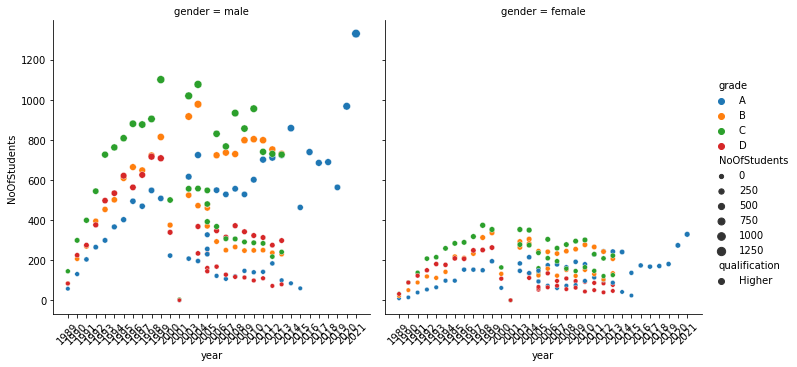

In [7]:
sns_plot = sns.relplot(data = gender_distribution_computing,
            x = "year", y = "NoOfStudents", col = "gender", #row = "qualification",
            hue = "grade", style = "qualification", size = "NoOfStudents"
)

#sns_plot.set_xlabel('')
sns_plot.set_xticklabels(rotation = 45)

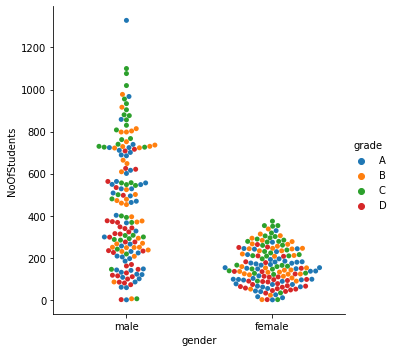

In [8]:
sns.catplot(data = gender_distribution_computing, kind = "swarm", 
            x = "gender", y = "NoOfStudents", 
            hue = "grade"#, palette = "crest" 
           )

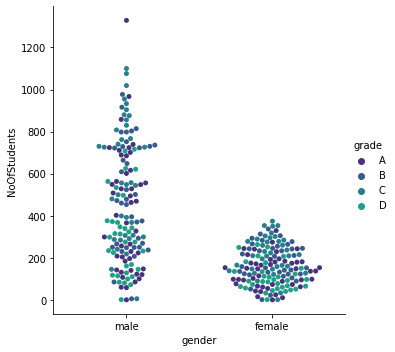

In [9]:
with sns.color_palette("viridis"):
    sns.catplot(data = gender_distribution_computing, kind = "swarm", 
                x = "gender", y = "NoOfStudents", 
                hue = "grade"#, palette = "crest" 
               )

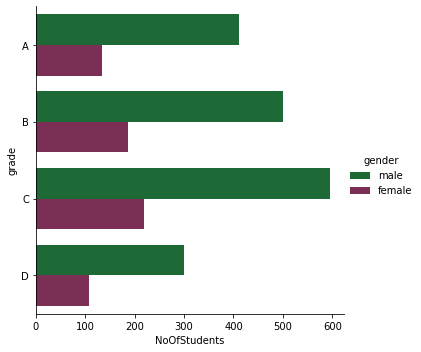

In [10]:
sns.catplot(data = gender_distribution_computing, kind = "bar", errorbar = None, 
            y = "grade", x = "NoOfStudents", 
            hue = "gender", palette = gender_colour_scheme
           )

In [11]:
gender_distribution_computing.where(gender_distribution_computing["gender"] == "female")

,qualification,year,Subject,SubjectGroup,CommonSubjectLabel,NumberOfCentres,gender,grade,NoOfStudents
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Higher,1989,Computing Studies,Computing,None,70.0,female,A,10.0
...,...,...,...,...,...,...,...,...,...
299,Higher,2019,Computing Science,Computing,None,NaN,female,A,181.0
300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
301,Higher,2020,Computing Science,Computing,None,NaN,female,A,274.0
302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
gender_distribution_computing.drop(columns = "PercentageOfStudents", errors = "ignore", inplace = True)

gender_distribution_computing = gender_distribution_computing.merge(
    gender_distribution_computing.groupby(by = ["qualification", "Subject", "year", "gender"], 
                                          dropna = True).agg(PercentageOfStudents = ("NoOfStudents", "sum")),
    left_on = ["qualification", "Subject", "year", "gender"], right_index = True)
#[["NoOfStudents"]]sum().rename(columns = {"NoOfStudents": "PercentageOfStudents"})

gender_distribution_computing["PercentageOfStudents"] = \
    gender_distribution_computing["NoOfStudents"] / gender_distribution_computing["PercentageOfStudents"]

gender_distribution_computing

,qualification,year,Subject,SubjectGroup,CommonSubjectLabel,NumberOfCentres,gender,grade,NoOfStudents,PercentageOfStudents
0,Higher,1989,Computing Studies,Computing,None,70.0,male,A,58.0,0.155914
1,Higher,1989,Computing Studies,Computing,None,70.0,male,B,85.0,0.228495
2,Higher,1989,Computing Studies,Computing,None,70.0,male,C,145.0,0.389785
3,Higher,1989,Computing Studies,Computing,None,70.0,male,D,84.0,0.225806
4,Higher,1989,Computing Studies,Computing,None,70.0,female,A,10.0,0.103093
...,...,...,...,...,...,...,...,...,...,...
299,Higher,2019,Computing Science,Computing,None,NaN,female,A,181.0,1.000000
300,Higher,2020,Computing Science,Computing,None,NaN,male,A,967.0,1.000000
301,Higher,2020,Computing Science,Computing,None,NaN,female,A,274.0,1.000000
302,Higher,2021,Computing Science,Computing,None,NaN,male,A,1329.0,1.000000


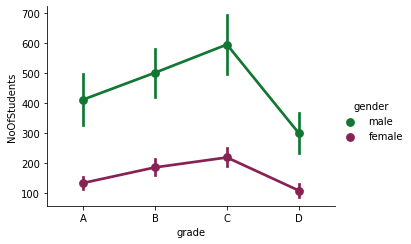

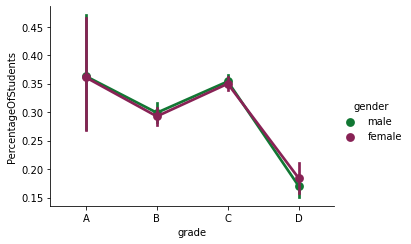

In [13]:
sns.catplot(data = gender_distribution_computing, kind = "point", 
            height = 3.5, aspect = 1.4,
            x = "grade", y = "NoOfStudents", 
            hue = "gender", palette = gender_colour_scheme
           )

sns.catplot(data = gender_distribution_computing, kind = "point", 
            height = 3.5, aspect = 1.4,
            x = "grade", y = "PercentageOfStudents", 
            hue = "gender", palette = gender_colour_scheme
           )

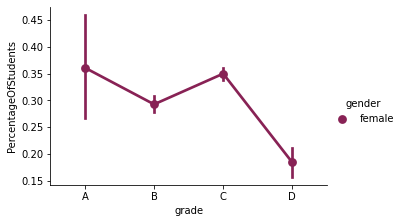

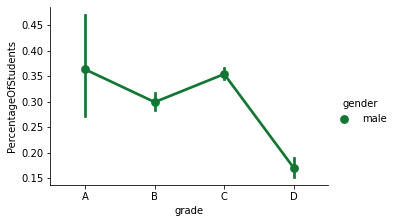

In [14]:
sns.catplot(data = gender_distribution_computing.loc[np.where(gender_distribution_computing["gender"] == "female")], 
            kind = "point", height = 3.2, aspect = 1.5,
            x = "grade", y = "PercentageOfStudents", 
            hue = "gender", palette = gender_colour_scheme
           )

sns.catplot(data = gender_distribution_computing.loc[np.where(gender_distribution_computing["gender"] == "male")], 
            kind = "point", height = 3.2, aspect = 1.5,
            x = "grade", y = "PercentageOfStudents", 
            hue = "gender", palette = gender_colour_scheme
           )

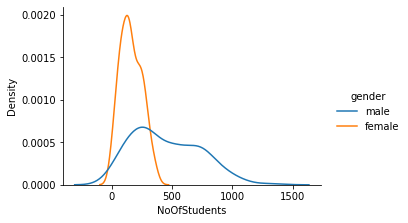

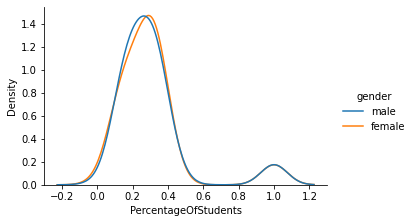

In [15]:
sns.displot(data = gender_distribution_computing, 
            x = "NoOfStudents", hue = "gender", kind = "kde", height = 3.2, aspect = 1.5)

sns.displot(data = gender_distribution_computing, 
            x = "PercentageOfStudents", hue = "gender", kind = "kde", height = 3.2, aspect = 1.5)

In [16]:

flip = gender_distribution_computing["gender"] == "male" # condition applied to FALSE

gender_distribution_computing["NoOfStudents"] = \
    gender_distribution_computing["NoOfStudents"].where(flip, - gender_distribution_computing["NoOfStudents"])
gender_distribution_computing["PercentageOfStudents"] = \
    gender_distribution_computing["PercentageOfStudents"].where(flip, - gender_distribution_computing["PercentageOfStudents"])

gender_distribution_computing

,qualification,year,Subject,SubjectGroup,CommonSubjectLabel,NumberOfCentres,gender,grade,NoOfStudents,PercentageOfStudents
0,Higher,1989,Computing Studies,Computing,None,70.0,male,A,58.0,0.155914
1,Higher,1989,Computing Studies,Computing,None,70.0,male,B,85.0,0.228495
2,Higher,1989,Computing Studies,Computing,None,70.0,male,C,145.0,0.389785
3,Higher,1989,Computing Studies,Computing,None,70.0,male,D,84.0,0.225806
4,Higher,1989,Computing Studies,Computing,None,70.0,female,A,-10.0,-0.103093
...,...,...,...,...,...,...,...,...,...,...
299,Higher,2019,Computing Science,Computing,None,NaN,female,A,-181.0,-1.000000
300,Higher,2020,Computing Science,Computing,None,NaN,male,A,967.0,1.000000
301,Higher,2020,Computing Science,Computing,None,NaN,female,A,-274.0,-1.000000
302,Higher,2021,Computing Science,Computing,None,NaN,male,A,1329.0,1.000000


In [17]:

gender_distribution_computing.loc[np.\
    where((gender_distribution_computing["gender"] == "female") & \
           (gender_distribution_computing["year"] == "2021"))]

,qualification,year,Subject,SubjectGroup,CommonSubjectLabel,NumberOfCentres,gender,grade,NoOfStudents,PercentageOfStudents
303,Higher,2021,Computing Science,Computing,None,NaN,female,A,-329.0,-1.0


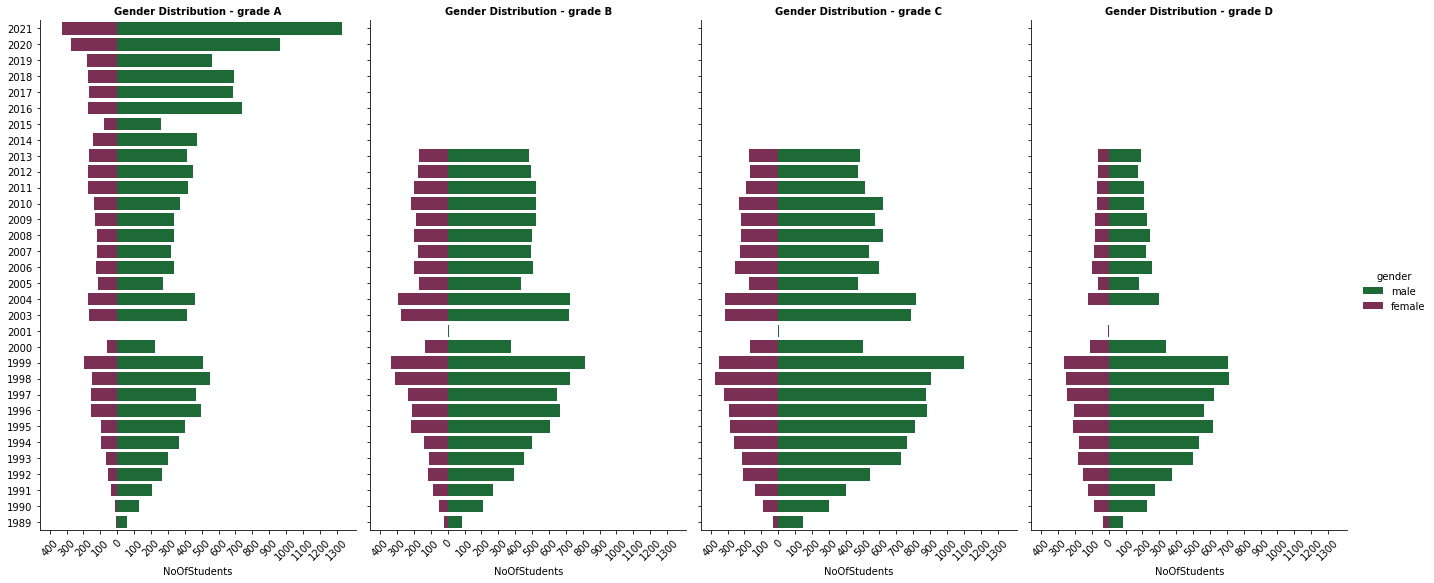

In [18]:
sns_plot = sns.catplot(data = gender_distribution_computing, errorbar = None, #stacked = True,
                       height = 8, aspect = 0.6, kind = "bar", col = "grade", dodge = False,
                       y = "year", x = "NoOfStudents",
                       hue = "gender", 
                       palette = gender_colour_scheme
                      )

sns_plot.set_titles("Gender Distribution - {col_var} {col_name}", fontweight = "bold", fontsize = 48)
sns_plot.set(ylabel = "") 

#sns.despine(left = True, bottom = True)
#sns_plot.invert_yaxis()
pyplt.ylim(reversed(pyplt.ylim()))

pyplt.xticks(list(range(math.floor(min(gender_distribution_computing["NoOfStudents"]) / 100) * 100,
                        math.ceil(max(gender_distribution_computing["NoOfStudents"]) / 100) * 100,
                        100)),
             list(list(range(abs(math.floor(min(gender_distribution_computing["NoOfStudents"]) / 100) * 100), 
                             math.floor(min(abs(gender_distribution_computing["NoOfStudents"])) / 100) * 100,
                             - 100)) +
                  list(range(0, math.ceil(max(abs(gender_distribution_computing["NoOfStudents"])) / 100) * 100,
                             100))
                 )
            )
sns_plot.set_xticklabels(rotation = 45)

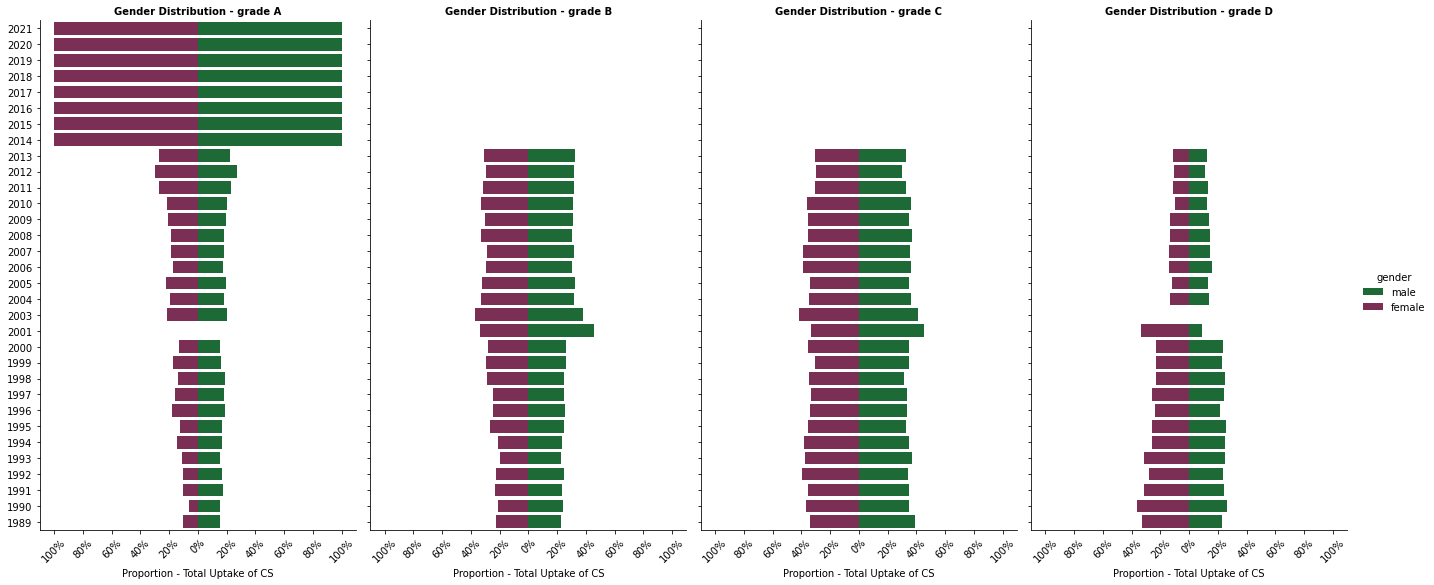

In [19]:
#gender_distribution_computing["PercentageOfStudents"] = gender_distribution_computing["PercentageOfStudents"] * 100


sns_plot = sns.catplot(data = gender_distribution_computing, errorbar = None, #stacked = True,
                       height = 8, aspect = 0.6, kind = "bar", col = "grade", dodge = False,
                       y = "year", x = "PercentageOfStudents",
                       hue = "gender", 
                       palette = gender_colour_scheme
                      )

sns_plot.set_titles("Gender Distribution - {col_var} {col_name}", fontweight = "bold", fontsize = 48)
sns_plot.set(ylabel = "") 
sns_plot.set(xlabel = "Proportion - Total Uptake of CS") 


#sns.despine(left = True, bottom = True)
#sns_plot.invert_yaxis()
pyplt.ylim(reversed(pyplt.ylim()))

lower_bound = list(range(math.floor(min(gender_distribution_computing["PercentageOfStudents"])) * 100, 
           math.ceil(max(gender_distribution_computing["PercentageOfStudents"])) * 100, 
           20))
lower_bound.append(math.ceil(max(gender_distribution_computing["PercentageOfStudents"])) * 100)

pyplt.xticks(np.array(lower_bound) / 100)

for axis in sns_plot.axes.flat:
    #axis.xaxis.set_major_formatter("{x:.0%}")
    #axis.xaxis.set_major_formatter(FuncFormatter(lambda x, _: abs(x)))
    axis.xaxis.set_major_formatter(FuncFormatter(lambda x, _: str(round(abs(x) * 100))  + "%"))
     
sns_plot.set_xticklabels(rotation = 45)

[Text(0, 0.5, '')]

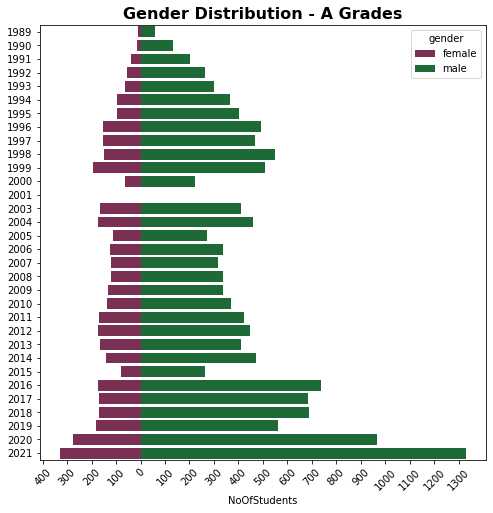

In [20]:
sub_plot = pyplt.subplots(figsize = (8, 8))
#sub_plot = pyplt.plot()


#sns.set_color_codes("pastel")
sns_plot = sns.barplot(data = gender_distribution_computing.loc[np.\
                                            where((gender_distribution_computing["gender"] == "female") & \
                                                   (gender_distribution_computing["grade"] == "A"))],
                                            #where(gender_distribution_computing["gender"] == "female")],
            y = "year", x = "NoOfStudents", errorbar = None, #kind = "bar", col = "grade",
            hue = "gender", 
            palette = gender_colour_scheme#, label = "Total"
           )

# sns.set_color_codes("muted")
sns.barplot(data = gender_distribution_computing.loc[np.\
                                            where((gender_distribution_computing["gender"] == "male") & \
                                                   (gender_distribution_computing["grade"] == "A"))],
                                            #where(gender_distribution_computing["gender"] == "male")],
            y = "year", x = "NoOfStudents", errorbar = None, #kind = "bar", col = "grade", 
            hue = "gender", 
            palette = gender_colour_scheme#, label = "Alcohol-involved"
           )

#sub_plot[1].invert_xaxis() 
sub_plot[1].set_xticks(list(range(math.floor(min(gender_distribution_computing["NoOfStudents"]) / 100) * 100,
                                  math.ceil(max(gender_distribution_computing["NoOfStudents"]) / 100) * 100,
                                  100)))
sub_plot[1].set_xticklabels(list(list(range(abs(math.floor(min(gender_distribution_computing["NoOfStudents"]) / 100) * 100), 
                                         math.floor(min(abs(gender_distribution_computing["NoOfStudents"])) / 100) * 100,
                                         - 100)) +
                              list(range(0, math.ceil(max(abs(gender_distribution_computing["NoOfStudents"])) / 100) * 100,
                                   100))
                            ), 
                            rotation = 45)

sns_plot.set_title("Gender Distribution - A Grades", fontweight = "bold", fontsize = 16)
sns_plot.set(ylabel = "") 

#sns.despine(left = True, bottom = True)
#sns.move_legend(sub_plot[1], loc = "right", ncol = 1, frameon = False, columnspacing = 1, handletextpad = 0)

In [21]:

gender_distribution_computing["NoOfStudents"] = \
    gender_distribution_computing["NoOfStudents"].where(flip, - gender_distribution_computing["NoOfStudents"])
gender_distribution_computing["PercentageOfStudents"] = \
    gender_distribution_computing["PercentageOfStudents"].where(flip, - gender_distribution_computing["PercentageOfStudents"])

gender_distribution_computing

,qualification,year,Subject,SubjectGroup,CommonSubjectLabel,NumberOfCentres,gender,grade,NoOfStudents,PercentageOfStudents
0,Higher,1989,Computing Studies,Computing,None,70.0,male,A,58.0,0.155914
1,Higher,1989,Computing Studies,Computing,None,70.0,male,B,85.0,0.228495
2,Higher,1989,Computing Studies,Computing,None,70.0,male,C,145.0,0.389785
3,Higher,1989,Computing Studies,Computing,None,70.0,male,D,84.0,0.225806
4,Higher,1989,Computing Studies,Computing,None,70.0,female,A,10.0,0.103093
...,...,...,...,...,...,...,...,...,...,...
299,Higher,2019,Computing Science,Computing,None,NaN,female,A,181.0,1.000000
300,Higher,2020,Computing Science,Computing,None,NaN,male,A,967.0,1.000000
301,Higher,2020,Computing Science,Computing,None,NaN,female,A,274.0,1.000000
302,Higher,2021,Computing Science,Computing,None,NaN,male,A,1329.0,1.000000


### Gender Distribution of Grades as a Proportion of ALL entries
* ... not just letter grades
* while still not complete - letter groups still missing from 2014, the proportions are correct as they take all grades including NoAward into account

In [87]:
gender_distribution_computing = pd.read_sql_query("SELECT qualification, year, Subject, SubjectGroup, CommonSubjectLabel, gender, grade, \
                         NoOfStudents, TotalEntries FROM sqa_data \
                     LEFT JOIN (SELECT Subject, SubjectGroup, CommonSubjectLabel, qualification, year \
                         FROM subject_groups \
                     ) subject_groups USING (Subject, qualification, year) \
                     INNER JOIN (SELECT * FROM grade_groups \
                         WHERE (grade_type = 'letter') \
                     ) grade_groups USING (grade) \
                     \
                     LEFT JOIN (SELECT DISTINCT year, qualification, Subject, gender, NoOfStudents AS TotalEntries FROM sqa_data \
                         LEFT JOIN (SELECT Subject, qualification, year \
                             FROM subject_groups \
                         ) subject_groups USING (Subject, qualification, year) \
                         INNER JOIN (SELECT * FROM grade_groups \
                             WHERE (grade_type = 'entries') \
                         ) grade_groups USING (grade) \
                     ) entries USING (year, qualification, Subject, gender) \
                     \
                     WHERE (qualification = 'Higher') AND \
                             (gender != 'all') AND (grade NOT IN ('Entries')) AND \
                             (NoOfStudents IS NOT NULL) AND \
                             (subject_groups.SubjectGroup LIKE '%Computing%')", 
                  dbConn) 

gender_distribution_computing

,qualification,year,Subject,SubjectGroup,CommonSubjectLabel,gender,grade,NoOfStudents,TotalEntries
0,Higher,1989,Computing Studies,Computing,None,male,A,58.0,469.0
1,Higher,1989,Computing Studies,Computing,None,male,B,85.0,469.0
2,Higher,1989,Computing Studies,Computing,None,male,C,145.0,469.0
3,Higher,1989,Computing Studies,Computing,None,male,D,84.0,469.0
4,Higher,1989,Computing Studies,Computing,None,female,A,10.0,124.0
...,...,...,...,...,...,...,...,...,...
299,Higher,2019,Computing Science,Computing,None,female,A,181.0,549.0
300,Higher,2020,Computing Science,Computing,None,male,A,967.0,2609.0
301,Higher,2020,Computing Science,Computing,None,female,A,274.0,557.0
302,Higher,2021,Computing Science,Computing,None,male,A,1329.0,2796.0


In [88]:
gender_distribution_computing["PercentageOfStudents"] = \
    gender_distribution_computing["NoOfStudents"] / gender_distribution_computing["TotalEntries"]

gender_distribution_computing

,qualification,year,Subject,SubjectGroup,CommonSubjectLabel,gender,grade,NoOfStudents,TotalEntries,PercentageOfStudents
0,Higher,1989,Computing Studies,Computing,None,male,A,58.0,469.0,0.123667
1,Higher,1989,Computing Studies,Computing,None,male,B,85.0,469.0,0.181237
2,Higher,1989,Computing Studies,Computing,None,male,C,145.0,469.0,0.309168
3,Higher,1989,Computing Studies,Computing,None,male,D,84.0,469.0,0.179104
4,Higher,1989,Computing Studies,Computing,None,female,A,10.0,124.0,0.080645
...,...,...,...,...,...,...,...,...,...,...
299,Higher,2019,Computing Science,Computing,None,female,A,181.0,549.0,0.329690
300,Higher,2020,Computing Science,Computing,None,male,A,967.0,2609.0,0.370640
301,Higher,2020,Computing Science,Computing,None,female,A,274.0,557.0,0.491921
302,Higher,2021,Computing Science,Computing,None,male,A,1329.0,2796.0,0.475322


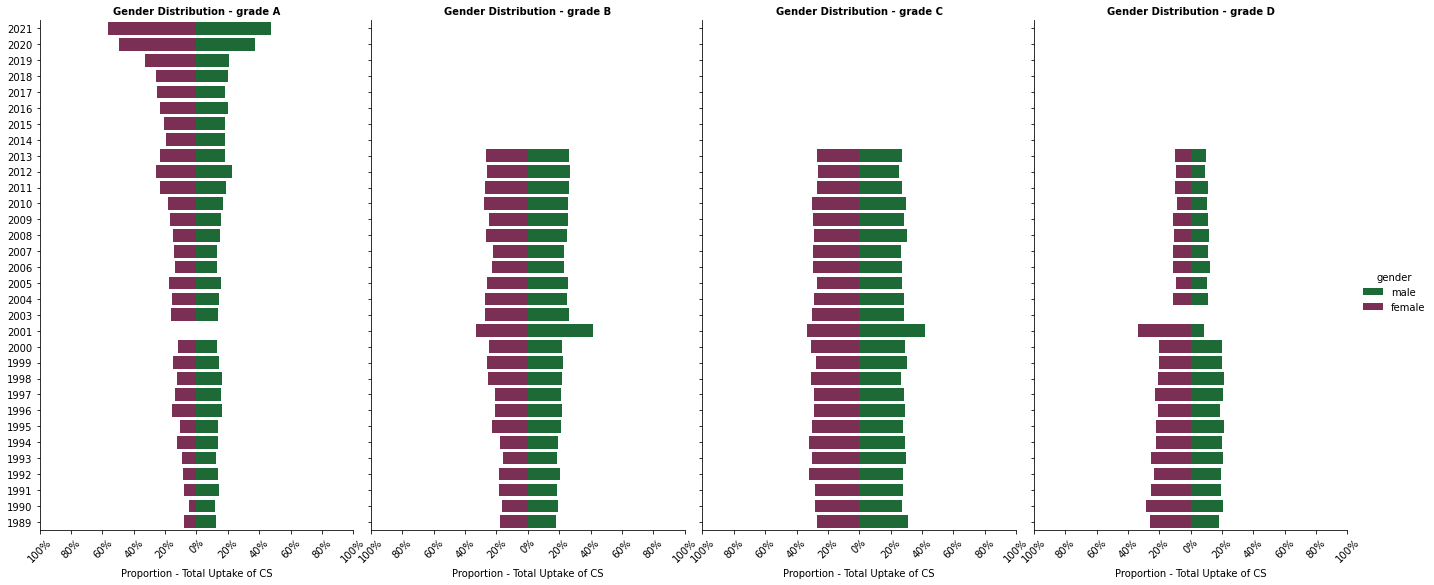

In [90]:
gender_distribution_computing["NoOfStudents"] = \
    gender_distribution_computing["NoOfStudents"].where(flip, - gender_distribution_computing["NoOfStudents"])
gender_distribution_computing["PercentageOfStudents"] = \
    gender_distribution_computing["PercentageOfStudents"].where(flip, - gender_distribution_computing["PercentageOfStudents"])

sns_plot = sns.catplot(data = gender_distribution_computing, errorbar = None, #stacked = True,
                       height = 8, aspect = 0.6, kind = "bar", col = "grade", dodge = False,
                       y = "year", x = "PercentageOfStudents",
                       hue = "gender", 
                       palette = gender_colour_scheme
                      )

sns_plot.set_titles("Gender Distribution - {col_var} {col_name}", fontweight = "bold", fontsize = 48)
sns_plot.set(ylabel = "") 
sns_plot.set(xlabel = "Proportion - Total Uptake of CS") 


pyplt.ylim(reversed(pyplt.ylim()))

lower_bound = list(range(math.floor(min(gender_distribution_computing["PercentageOfStudents"])) * 100, 
           math.ceil(max(gender_distribution_computing["PercentageOfStudents"])) * 100, 
           20))
lower_bound.append(math.ceil(max(gender_distribution_computing["PercentageOfStudents"])) * 100)

pyplt.xticks(np.array(lower_bound) / 100)

for axis in sns_plot.axes.flat:
    axis.xaxis.set_major_formatter(FuncFormatter(lambda x, _: str(round(abs(x) * 100))  + "%"))
     
sns_plot.set_xticklabels(rotation = 45)

In [94]:
# .. and flip back ...

gender_distribution_computing["NoOfStudents"] = \
    gender_distribution_computing["NoOfStudents"].where(flip, - gender_distribution_computing["NoOfStudents"])
gender_distribution_computing["PercentageOfStudents"] = \
    gender_distribution_computing["PercentageOfStudents"].where(flip, - gender_distribution_computing["PercentageOfStudents"])

gender_distribution_computing

,qualification,year,Subject,SubjectGroup,CommonSubjectLabel,gender,grade,NoOfStudents,TotalEntries,PercentageOfStudents
0,Higher,1989,Computing Studies,Computing,None,male,A,58.0,469.0,0.123667
1,Higher,1989,Computing Studies,Computing,None,male,B,85.0,469.0,0.181237
2,Higher,1989,Computing Studies,Computing,None,male,C,145.0,469.0,0.309168
3,Higher,1989,Computing Studies,Computing,None,male,D,84.0,469.0,0.179104
4,Higher,1989,Computing Studies,Computing,None,female,A,10.0,124.0,0.080645
...,...,...,...,...,...,...,...,...,...,...
299,Higher,2019,Computing Science,Computing,None,female,A,181.0,549.0,0.329690
300,Higher,2020,Computing Science,Computing,None,male,A,967.0,2609.0,0.370640
301,Higher,2020,Computing Science,Computing,None,female,A,274.0,557.0,0.491921
302,Higher,2021,Computing Science,Computing,None,male,A,1329.0,2796.0,0.475322
